# <b id="section_2">  </b> <b style='color:#800080'>1. ספריות רלוונטיות </b> <b></b> 

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px

# <b id="section_2">  </b> <b style='color:#800080'>2. מידע כללי על הדאטה </b> <b></b> 
#### מידע על הדאטה
מטרת הפרויקט שלנו היא לבחון סוגי אסונות טבע בעולם והשפעתן בהבטים מסוימים <br>נלקח מ:  [Kaggle](https://www.kaggle.com/datasets/brsdincer/all-natural-disasters-19002021-eosdis )

In [17]:
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

In [18]:
read_file.shape #return tupple of the rows, columns number.

(16126, 45)

In [19]:
read_file.columns #return all columns names into list

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [20]:
read_file #present the whole data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [21]:
read_file.info() #general information about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [22]:
disaster_types = read_file['Disaster Type'].unique() #return list of each value in Disaster Type column
disaster_types

array(['Drought', 'Earthquake', 'Volcanic activity',
       'Mass movement (dry)', 'Storm', 'Flood', 'Epidemic', 'Landslide',
       'Wildfire', 'Extreme temperature ', 'Fog', 'Insect infestation',
       'Impact', 'Animal accident', 'Glacial lake outburst'], dtype=object)

In [23]:
first_year = read_file['Year'].iloc[0]
last_year = read_file['Year'].iloc[-1]
years = last_year - first_year
print('first year: ',first_year)
print('last year: ',last_year)
print('Total: ',years)

first year:  1900
last year:  2021
Total:  121


In [24]:
read_file.isnull().sum() # מראה כמה ערכים חסרים יש לנו בכל עמודה

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

In [25]:
read_file.dtypes #מראה את הסוג של כל נתון

Year                            int64
Seq                             int64
Glide                          object
Disaster Group                 object
Disaster Subgroup              object
Disaster Type                  object
Disaster Subtype               object
Disaster Subsubtype            object
Event Name                     object
Country                        object
ISO                            object
Region                         object
Continent                      object
Location                       object
Origin                         object
Associated Dis                 object
Associated Dis2                object
OFDA Response                  object
Appeal                         object
Declaration                    object
Aid Contribution              float64
Dis Mag Value                 float64
Dis Mag Scale                  object
Latitude                       object
Longitude                      object
Local Time                     object
River Basin 

In [26]:
continent_disaster_counts = read_file.groupby(['Continent', 'Disaster Type']).size().reset_index(name='Count')
continent_disaster_counts

,Continent,Disaster Type,Count
0,Africa,Animal accident,1
1,Africa,Drought,341
2,Africa,Earthquake,74
3,Africa,Epidemic,878
4,Africa,Extreme temperature,20
5,Africa,Flood,1147
6,Africa,Insect infestation,77
7,Africa,Landslide,59
8,Africa,Mass movement (dry),5
9,Africa,Storm,290


In [27]:
continent_disaster_counts.Count.describe()
#נתוני סטטיסטיקה על כמות האירועים לפפי יבשת

count      59.000000
mean      273.322034
std       472.491249
min         1.000000
25%        20.000000
50%        82.000000
75%       281.500000
max      2303.000000
Name: Count, dtype: float64

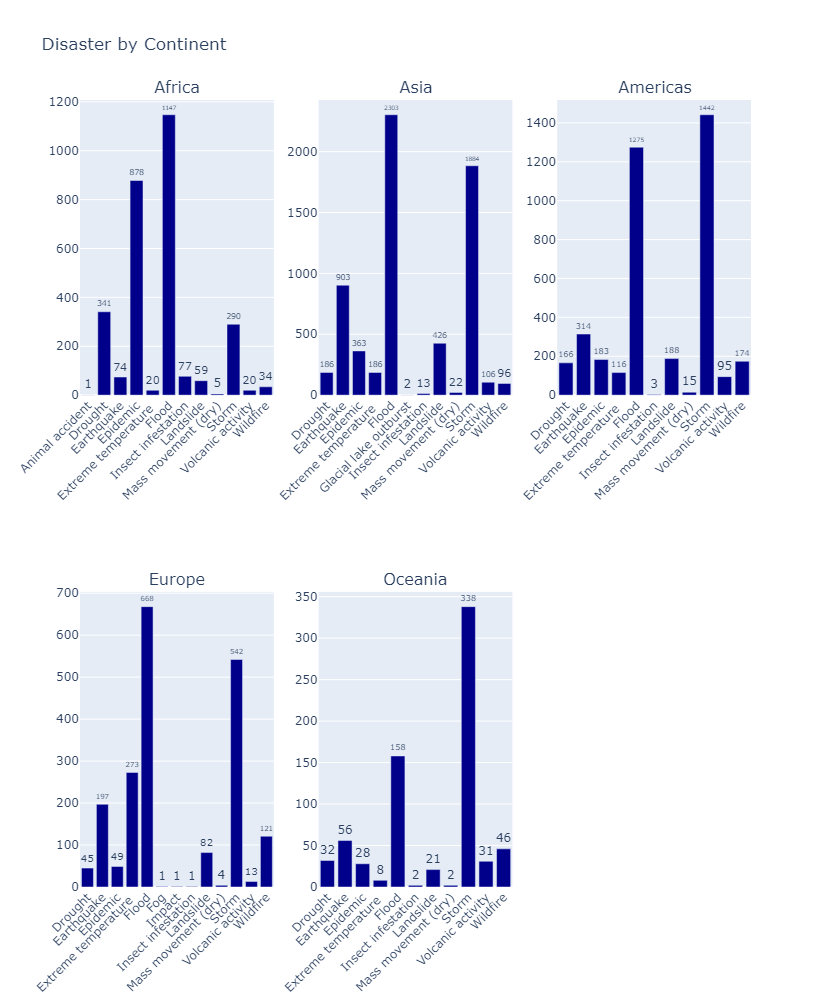

In [28]:
continents = read_file['Continent'].unique()
fig = make_subplots(rows=2, cols=3, subplot_titles=continents)
for i, continent in enumerate(continents):
    continent_data = continent_disaster_counts[continent_disaster_counts['Continent'] == continent]
    fig.add_trace(go.Bar(
            x=continent_data['Disaster Type'], 
            y=continent_data['Count'],
            text=continent_data['Count'],  
            marker_color='darkblue',  
            textposition='outside',
            name=f'Disaster Distribution in {continent}'),
        row=(i // 3) + 1 ,col=(i % 3) + 1) 
  
fig.update_layout(title_text='Disaster by Continent', height=1000,showlegend=False)
fig.update_xaxes(tickangle=-45)

#### מסקנה מהגרף: ניתן לראות שיש שני סוגי אסונות שכיחים ובולטים בכל היבשות - סופות והצפות

# <b id="section_2">  </b> <b style='color:#800080'>3. יחס בין אסונות שכיחים לבין כמות הרוגים  </b> <b></b> 

#### ננתח מספר מתים בכל אסון :

In [29]:
deaths_per_disaster = read_file.groupby('Disaster Type')['Total Deaths'].sum().reset_index()
deaths_per_disaster

,Disaster Type,Total Deaths
0,Animal accident,12.0
1,Drought,11731424.0
2,Earthquake,2342188.0
3,Epidemic,9616245.0
4,Extreme temperature,193417.0
5,Flood,6993561.0
6,Fog,4000.0
7,Glacial lake outburst,250.0
8,Impact,0.0
9,Insect infestation,0.0


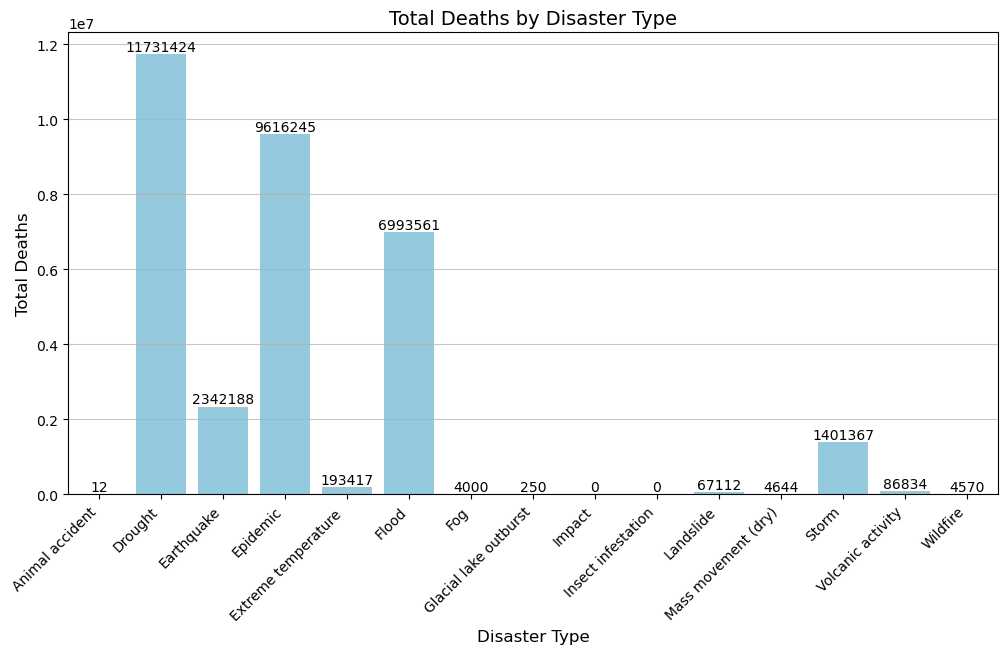

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=deaths_per_disaster, x='Disaster Type', y='Total Deaths', color='skyblue')

for index, row in deaths_per_disaster.iterrows():
    plt.text(index, int(row['Total Deaths']) + 1000, int(row['Total Deaths']), ha='center', va='bottom', fontsize=10)


plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.title('Total Deaths by Disaster Type', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='-', alpha=0.7)  

#### מסקנה מהגרף: ניתן לראות שקיים פער משמעותי בשכיחות אסון ה'בצורת' לבין מספר ההרוגים הגבוה באסון זה

In [136]:
drought_data = read_file[read_file['Disaster Type'] == 'Drought']
drought_data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations,Season
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN,None
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN,None
24,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Burkina Faso,...,NaN,NaN,NaN,NaN,3.608245,NaN,NaN,NaN,NaN,None
27,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,3.608245,NaN,NaN,NaN,NaN,None
30,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Gambia (the),...,NaN,NaN,NaN,NaN,3.608245,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15968,2021,9547,DR-2021-000120,Natural,Climatological,Drought,Drought,NaN,NaN,Tuvalu,...,NaN,10204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter
15987,2019,9667,OT-2019-000132,Natural,Climatological,Drought,Drought,NaN,NaN,Zambia,...,NaN,1420000.0,NaN,NaN,98.781448,NaN,NaN,NaN,NaN,None
16000,2019,9598,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,South Africa,...,NaN,750000.0,NaN,135000.0,98.781448,NaN,NaN,NaN,NaN,Winter
16024,2020,9585,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,United States of America (the),...,NaN,NaN,NaN,4500000.0,100.000000,1,3214;3215;3216;3217;3218;3219;3225;3226;3227;3...,NaN,"Alabama, Alaska, Arizona, Arkansas, California...",Winter


In [70]:
drought_deaths_by_continent = drought_data.groupby('Continent')['Total Deaths'].sum().reset_index()
drought_deaths_by_continent #מתים רק מבצורת

,Continent,Total Deaths
0,Africa,867131.0
1,Americas,130.0
2,Asia,9663477.0
3,Europe,1200002.0
4,Oceania,684.0


In [75]:
drought_events_by_continent = drought_data['Continent'].value_counts().reset_index()
drought_events_by_continent.columns = ['Continent', 'Number of Events']
drought_events_by_continent #מספר האירועים של הבצורת בכל יבשת

,Continent,Number of Events
0,Africa,341
1,Asia,186
2,Americas,166
3,Europe,45
4,Oceania,32


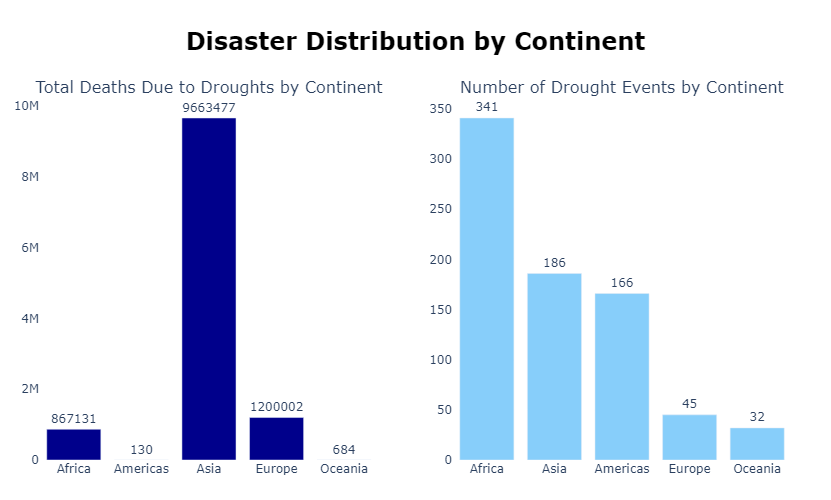

In [142]:
fig_events.update_traces(texttemplate='%{text:.0f}', textposition='outside', marker_color='lightskyblue')
fig_events.update_yaxes(title_text='Number of Events', tickformat=',d')
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Deaths Due to Droughts by Continent', 'Number of Drought Events by Continent'))
fig.add_trace(fig_deaths['data'][0], row=1, col=1)
fig.add_trace(fig_events['data'][0], row=1, col=2)

fig.update_layout(title_text='<b style="color:black; font-size:24px;">Disaster Distribution by Continent</b>',
                  showlegend=False, width=900, height=500,
                  margin=dict(t=100, b=40, l=40, r=40),
                  title_x=0.5,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  font=dict(size=12))

#### מסקנה מעניינת שניתן להסיק מגרפים אלו:

מהגרפים ניתן לראות כי יבשת אסיה סובלת מהמספר הגבוה ביותר של מתים בעקבות בצורת, עם כמות משמעותית של יותר מתשעה מיליון מתים. עם זאת, מספר האירועים שקרו באסיה הוא לא בהכרח הגבוה ביותר ביחס למספר זה. זאת לעומת יבשת אפריקה, שגם בה יש כמות גבוהה של מתים, אך מספר האירועים בה הוא גדול יותר.

זה מצביע על כך שבאסיה כל אירוע בצורת הוא חמור הרבה יותר מבחינת כמות המתים בהשוואה לאפריקה, ואילו באפריקה יש יותר אירועים, אך כל אירוע פוגע בכמות פחותה יותר של אנשים.

In [143]:
# נחשב את מספר ההתרחשויות של כל סוג אסון
disaster_counts = read_file['Disaster Type'].value_counts()
disaster_counts

Disaster Type
Flood                    5551
Storm                    4496
Earthquake               1544
Epidemic                 1501
Landslide                 776
Drought                   770
Extreme temperature       603
Wildfire                  471
Volcanic activity         265
Insect infestation         96
Mass movement (dry)        48
Glacial lake outburst       2
Fog                         1
Impact                      1
Animal accident             1
Name: count, dtype: int64

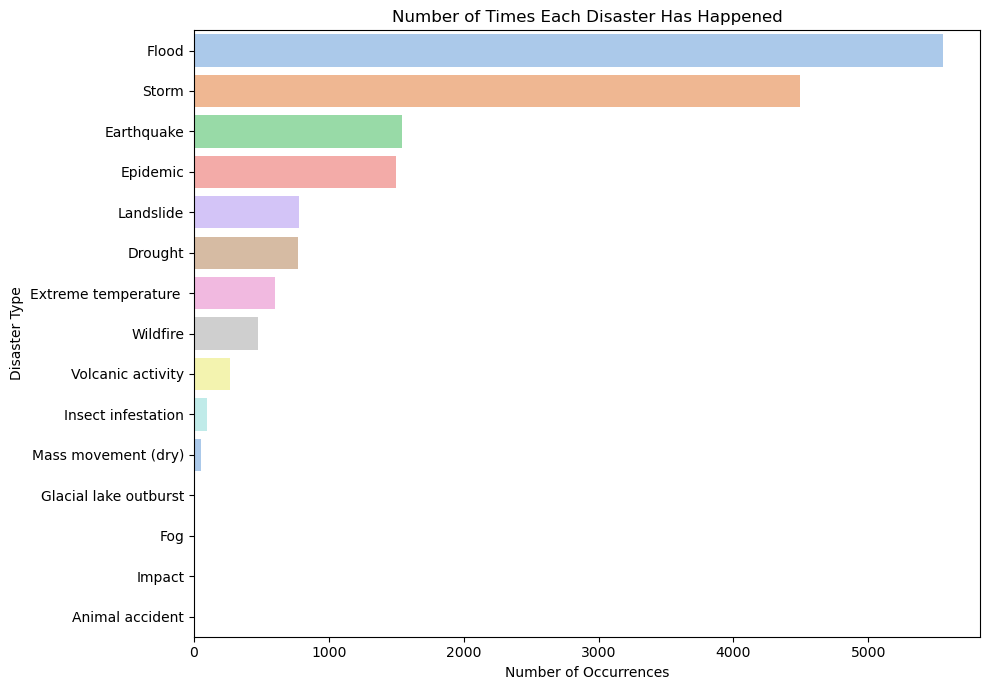

In [144]:
plt.figure(figsize=(10, 7))
sns.barplot(x=disaster_counts.values, y=disaster_counts.index, palette="pastel")
plt.title('Number of Times Each Disaster Has Happened')
plt.xlabel('Number of Occurrences')
plt.ylabel('Disaster Type')
plt.tight_layout()

In [145]:
full_fields_count = read_file['Total Damages (\'000 US$)'].notnull().sum()
print("Number of full fields in 'Total Damages (\'000 US$)':", full_fields_count)
#לשאול את ליהיא אם אפשר לנתח את העמודה של הנזק הכלכלי כשיש לנו רק 1/3 מהנתונים

Number of full fields in 'Total Damages ('000 US$)': 5245


In [146]:
#מיון לפי 2 האסונות העיקריים-הצפות וסופות
flood_strom_disaster = read_file[read_file['Disaster Type'].isin(['Flood', 'Storm'])]
counts_per_year = flood_strom_disaster.groupby(['Year', 'Disaster Type']).size().reset_index(name='Counts')
counts_per_year #מספר כל אסון בשנה

,Year,Disaster Type,Counts
0,1900,Flood,1
1,1900,Storm,1
2,1902,Storm,1
3,1903,Flood,2
4,1903,Storm,2
...,...,...,...
211,2019,Storm,91
212,2020,Flood,201
213,2020,Storm,128
214,2021,Flood,160


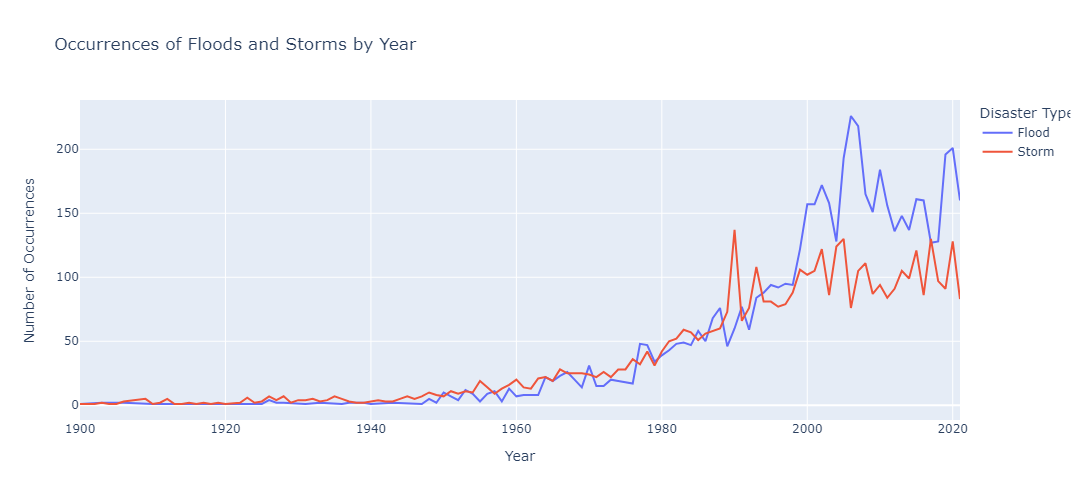

In [101]:
fig = px.line(counts_per_year, x='Year', y='Counts', color='Disaster Type',
              title='Occurrences of Floods and Storms by Year',
              labels={'Year':'Year', 'Counts':'Number of Occurrences', 'Disaster Type':'Disaster Type'})

fig.update_layout(width=900, height=500)#תדירות הצפות וסופות לפי שנה

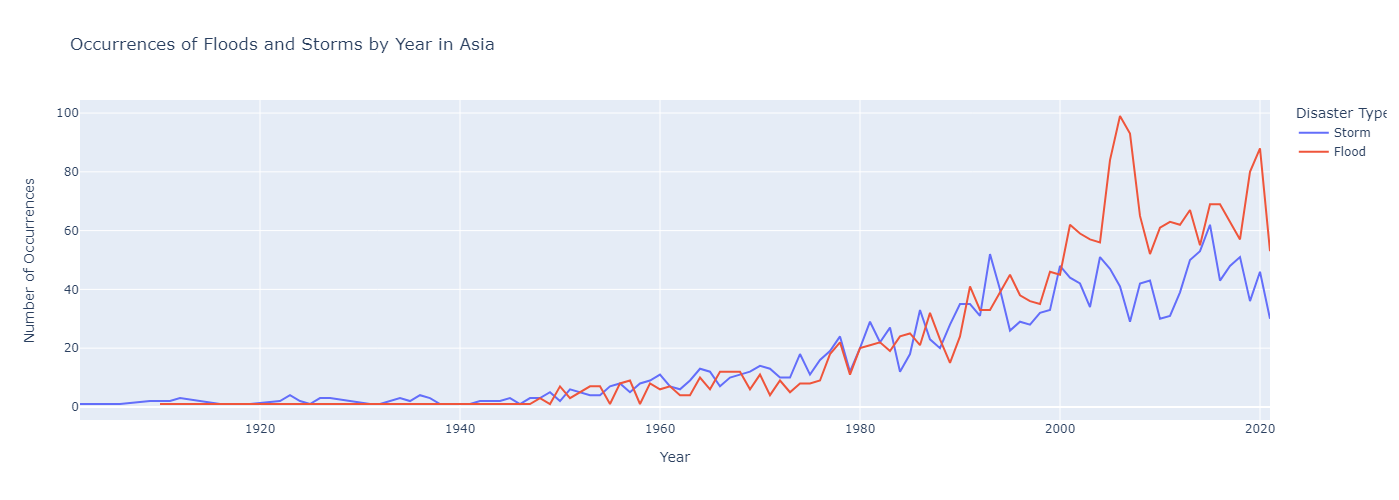

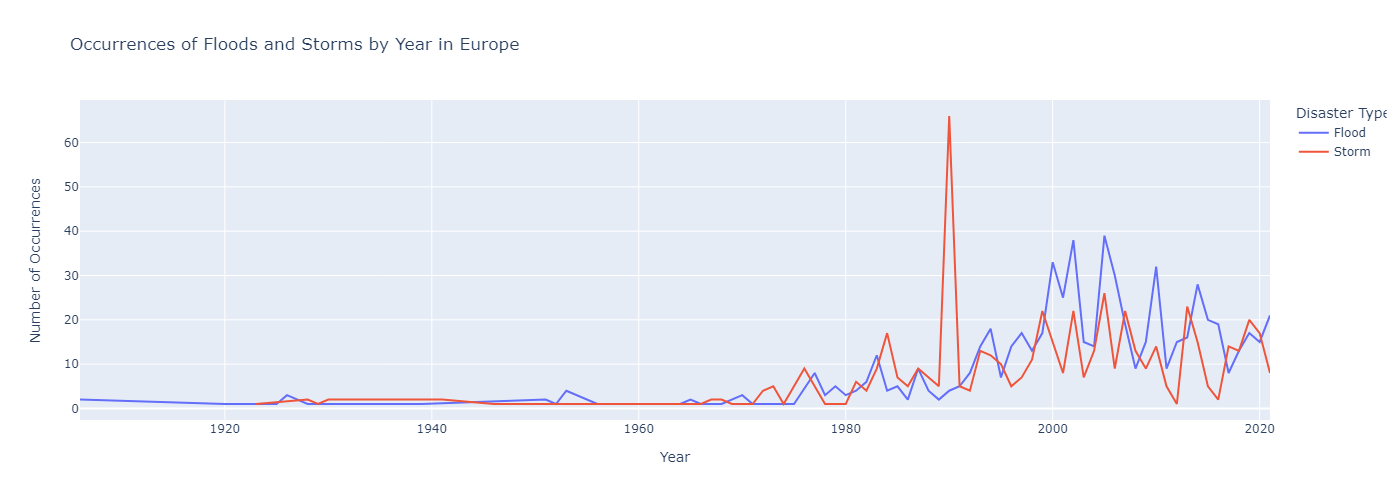

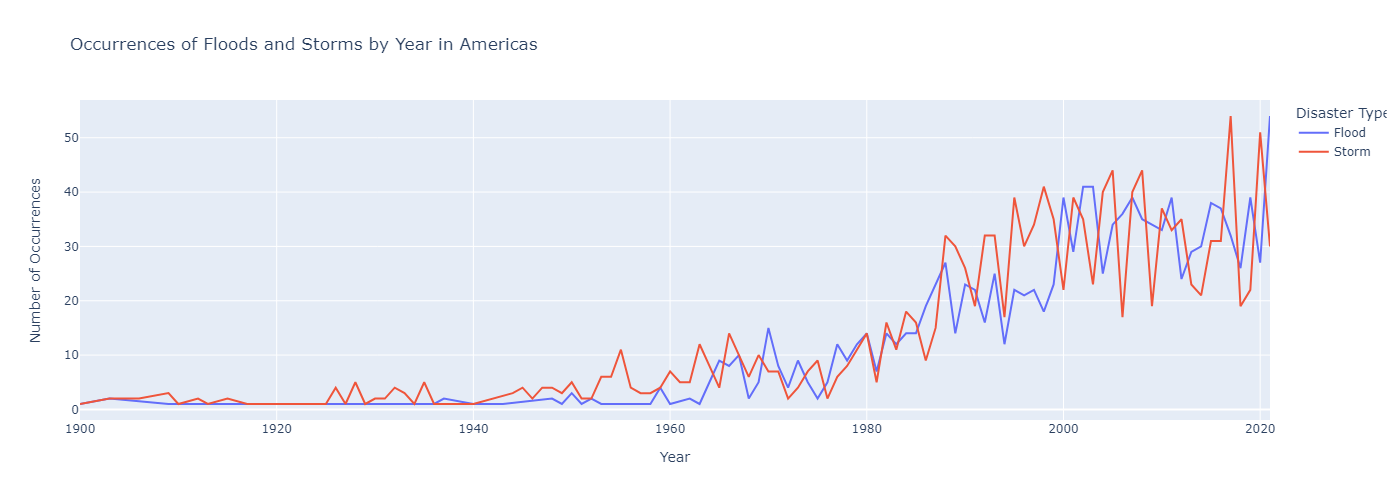

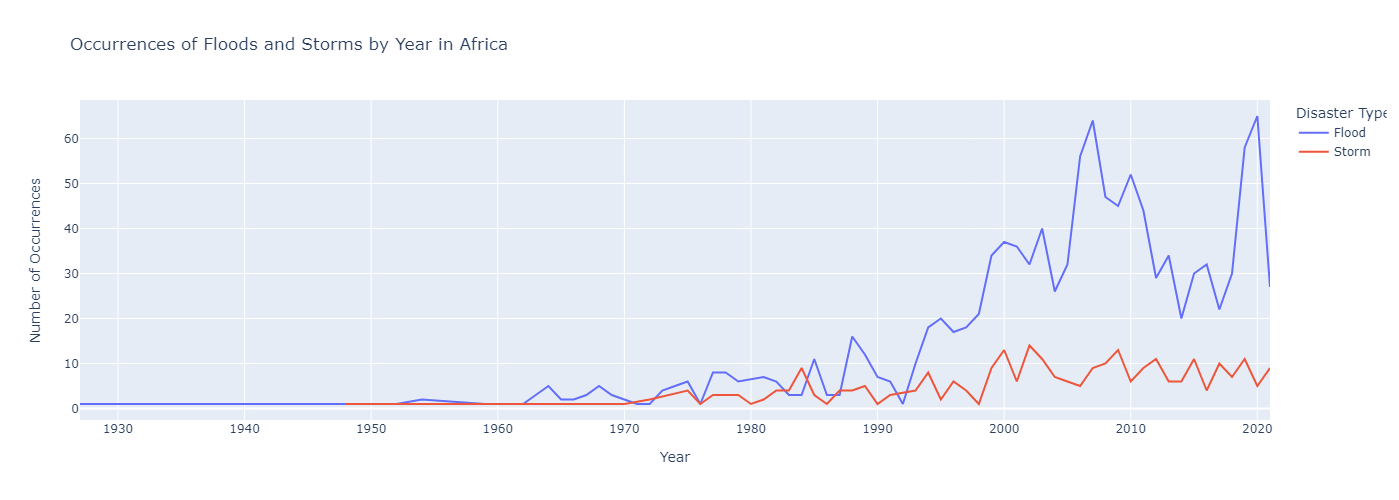

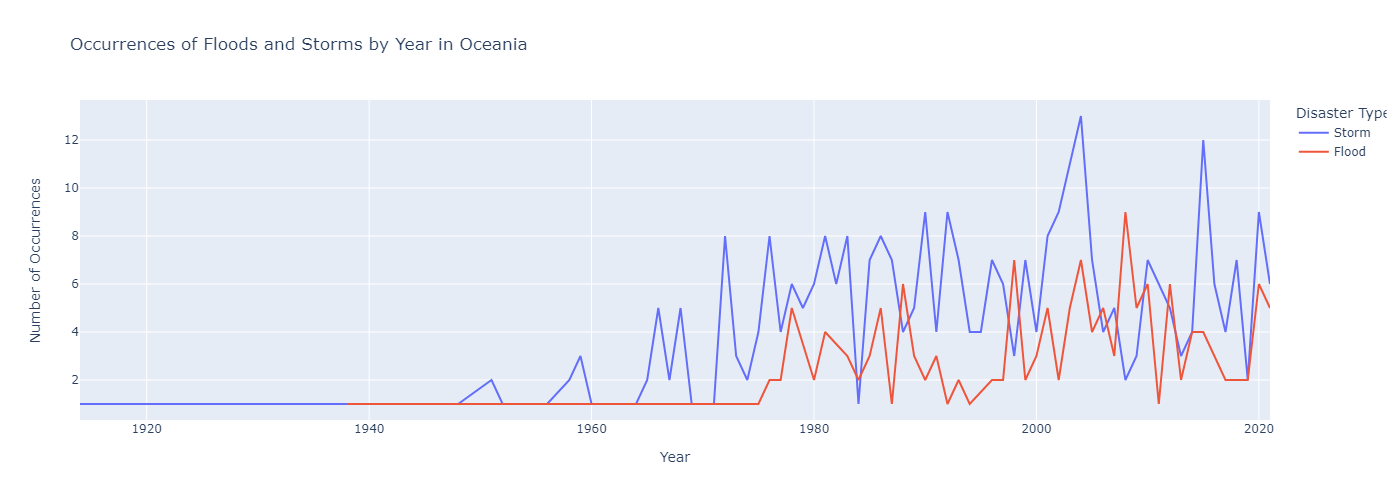

In [64]:
filtered_data = read_file[read_file['Disaster Type'].isin(['Flood', 'Storm'])]
# יצירת גרפים עבור כל יבשת
for continent in continents:
    continent_data = filtered_data[filtered_data['Continent'] == continent]
    
    # חישוב מספר ההתרחשויות לפי שנה וסוג אסון
    counts_per_year = continent_data.groupby(['Year', 'Disaster Type']).size().reset_index(name='Counts')
    
    # יצירת גרף קו עבור היבשת הנוכחית
    fig = px.line(counts_per_year, x='Year', y='Counts', color='Disaster Type',
                  title=f'Occurrences of Floods and Storms by Year in {continent}',
                  labels={'Year':'Year', 'Counts':'Number of Occurrences', 'Disaster Type':'Disaster Type'})
    
    fig.update_layout(width=900, height=500)
    fig.show()

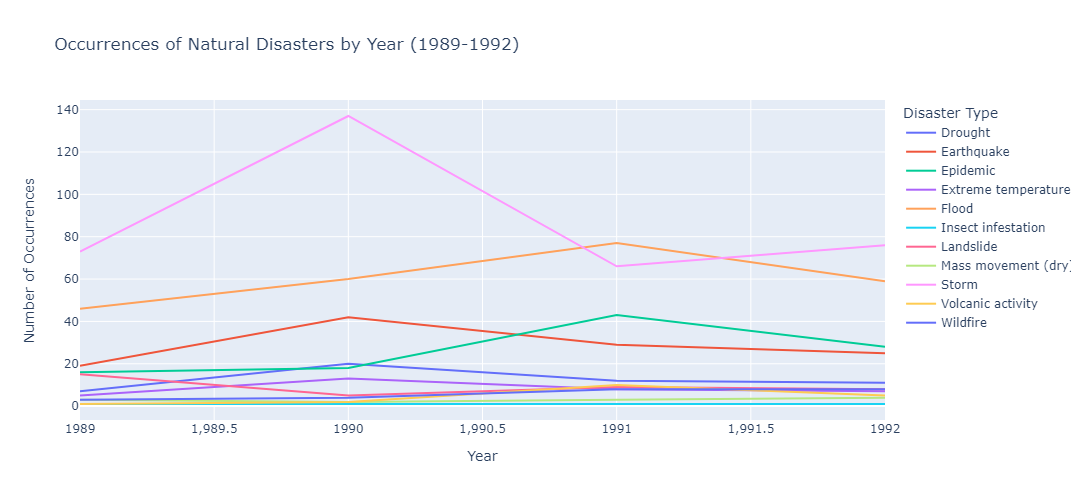

In [38]:
filtered_data = read_file[(read_file['Year'] >= 1989) & (read_file['Year'] <= 1992)]

# חישוב מספר ההתרחשויות לפי שנה וסוג אסון
counts_per_year = filtered_data.groupby(['Year', 'Disaster Type']).size().reset_index(name='Counts')

# יצירת גרף קו עבור כל סוגי האסונות בשנים אלו
fig = px.line(counts_per_year, x='Year', y='Counts', color='Disaster Type',
              title='Occurrences of Natural Disasters by Year (1989-1992)',
              labels={'Year':'Year', 'Counts':'Number of Occurrences', 'Disaster Type':'Disaster Type'})

fig.update_layout(width=900, height=500)
fig.show()

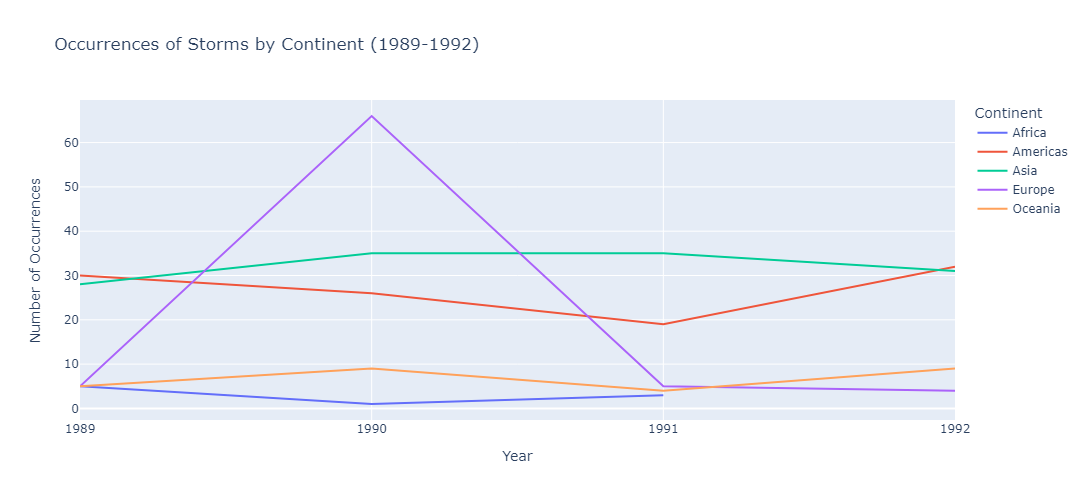

In [42]:
# חישוב מספר ההתרחשויות בין השנים 1989-1992 לפי יבשת 
filtered_data = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] >= 1989) & (read_file['Year'] <= 1992)]
counts_per_continent = filtered_data.groupby(['Year', 'Continent']).size().reset_index(name='Counts')
fig = px.line(counts_per_continent, x='Year', y='Counts', color='Continent',
              title='Occurrences of Storms by Continent (1989-1992)',
              labels={'Year':'Year', 'Counts':'Number of Occurrences', 'Continent':'Continent'})
fig.update_layout(width=900, height=500, xaxis=dict(dtick=1))

In [57]:
# בדיקת הנתונים עבור אפריקה בשנת 1992
africa_1992 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1992) & (read_file['Continent'] == 'Africa')]
print(africa_1992)

Empty DataFrame
Columns: [Year, Seq, Glide, Disaster Group, Disaster Subgroup, Disaster Type, Disaster Subtype, Disaster Subsubtype, Event Name, Country, ISO, Region, Continent, Location, Origin, Associated Dis, Associated Dis2, OFDA Response, Appeal, Declaration, Aid Contribution, Dis Mag Value, Dis Mag Scale, Latitude, Longitude, Local Time, River Basin, Start Year, Start Month, Start Day, End Year, End Month, End Day, Total Deaths, No Injured, No Affected, No Homeless, Total Affected, Insured Damages ('000 US$), Total Damages ('000 US$), CPI, Adm Level, Admin1 Code, Admin2 Code, Geo Locations]
Index: []

[0 rows x 45 columns]


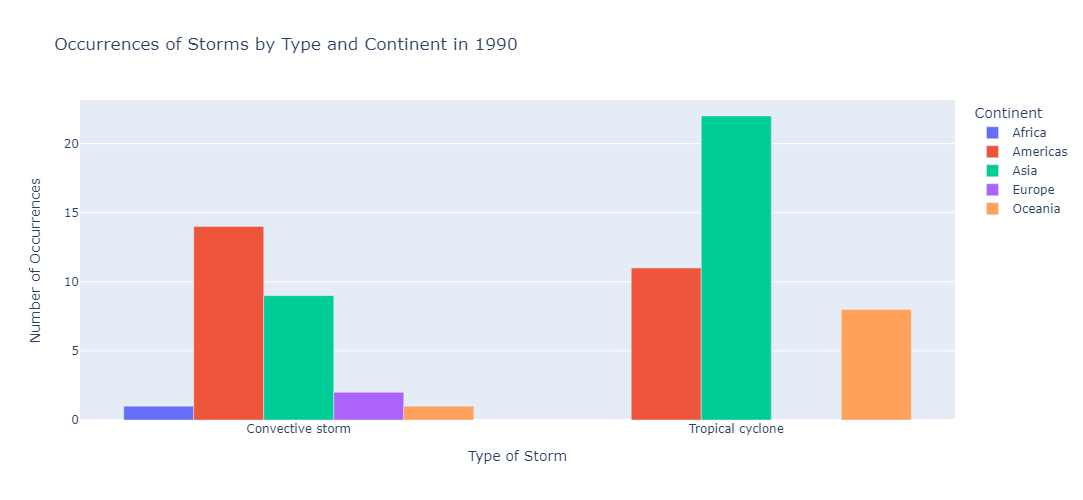

In [60]:
# יצירת גרף קבוצות עמודות עבור סופות לפי סוג ומיקום גאוגרפי
fig = px.bar(counts_per_type_and_continent, x='Disaster Subtype', y='Counts', color='Continent', barmode='group',
             title='Occurrences of Storms by Type and Continent in 1990',
             labels={'Disaster Subtype':'Type of Storm', 'Counts':'Number of Occurrences', 'Continent':'Continent'})

fig.update_layout(width=900, height=500)

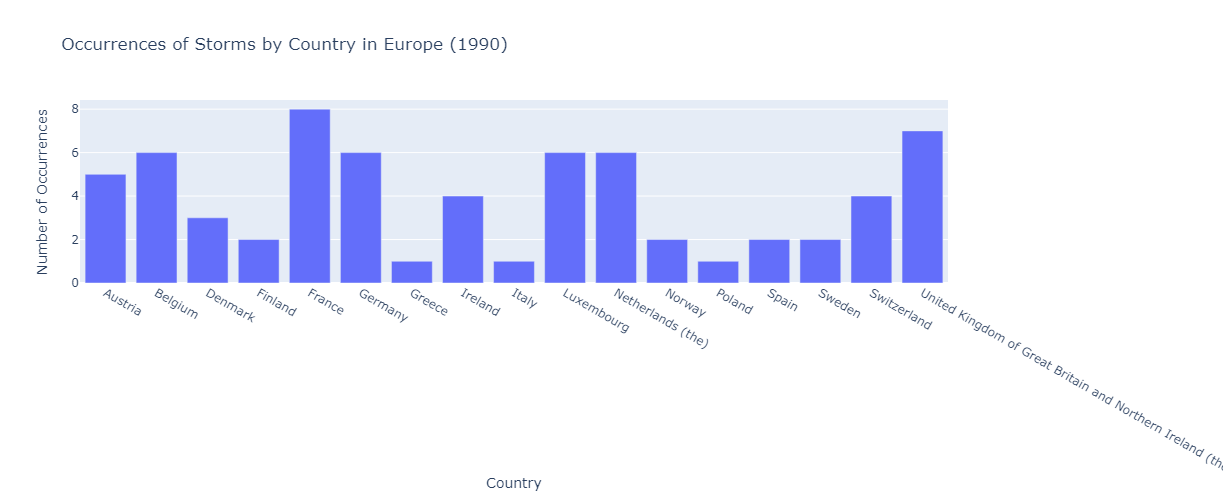

In [66]:
# סינון נתונים עבור סופות באירופה בשנת 1990
storms_europe_1990 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1990) & (read_file['Continent'] == 'Europe')]

# חישוב מספר ההתרחשויות לפי מדינה באירופה
counts_per_country = storms_europe_1990.groupby('Country').size().reset_index(name='Counts')

# יצירת גרף עמודות עבור סופות לפי מדינה באירופה בשנת 1990
fig = px.bar(counts_per_country, x='Country', y='Counts',
             title='Occurrences of Storms by Country in Europe (1990)',
             labels={'Country':'Country', 'Counts':'Number of Occurrences'})

fig.update_layout(width=900, height=500)
fig.show()

In [68]:
filtered_data = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] >= 1989) & (read_file['Year'] <= 1992)]
counts_per_continent = filtered_data.groupby(['Year', 'Continent']).size().reset_index(name='Counts')

In [70]:
data_1990 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1990)]
counts_per_type_and_continent = data_1990.groupby(['Disaster Subtype', 'Continent']).size().reset_index(name='Counts')

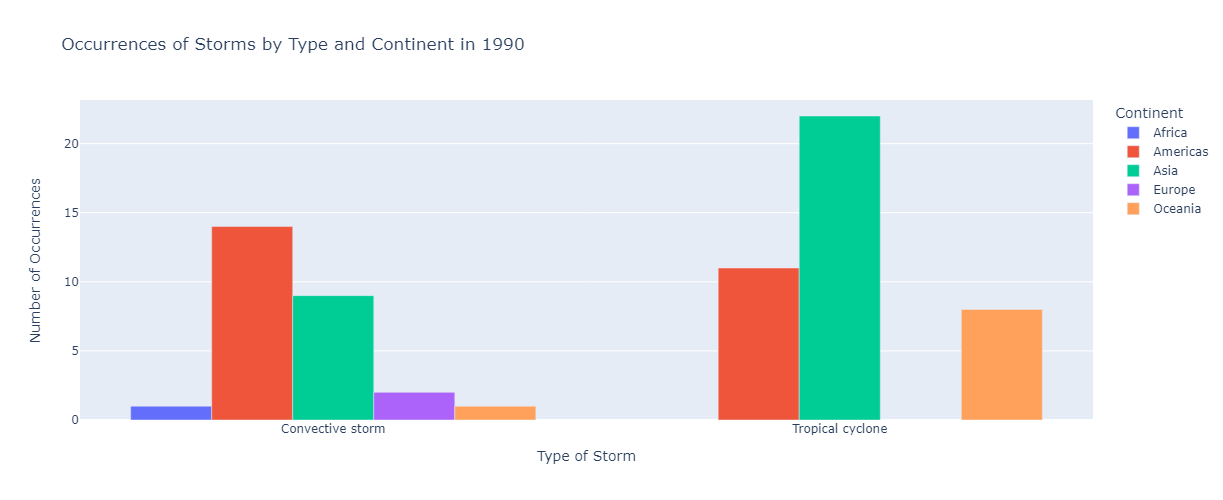

In [71]:
fig = px.bar(counts_per_type_and_continent, x='Disaster Subtype', y='Counts', color='Continent', barmode='group',
             title='Occurrences of Storms by Type and Continent in 1990',
             labels={'Disaster Subtype':'Type of Storm', 'Counts':'Number of Occurrences', 'Continent':'Continent'})
fig.update_layout(width=900, height=500)

In [72]:
data_europe_1990 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1990) & (read_file['Continent'] == 'Europe')]

# חישוב מספר ההתרחשויות באירופה בשנת 1990
counts_europe_1990 = data_europe_1990.shape[0]  # מספר השורות במסגרת הנתונים של אירופה בשנת 1990

print(f"Occurrences of storms in Europe in 1990: {counts_europe_1990}")

Occurrences of storms in Europe in 1990: 66


In [73]:
import pandas as pd

# טעינת הנתונים
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

# סינון הנתונים לסופות באירופה בשנת 1990
storms_europe_1990 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1990) & (read_file['Continent'] == 'Europe')]

# חישוב והצגת כמות המקרים לפי סוגי הסופות
storm_counts_by_subtype = storms_europe_1990['Disaster Subtype'].value_counts()

# הדפסת התוצאה
print("Occurrences of storm subtypes in Europe in 1990:")
print(storm_counts_by_subtype)

Occurrences of storm subtypes in Europe in 1990:
Disaster Subtype
Convective storm    2
Name: count, dtype: int64


In [77]:
europe_1990_data = read_file[(read_file['Continent'] == 'Europe') & (read_file['Year'] == 1990)][['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype']]
print(europe_1990_data)

     Disaster Group Disaster Subgroup Disaster Type  Disaster Subtype
3847        Natural    Meteorological         Storm  Convective storm
3856        Natural    Meteorological         Storm  Convective storm
3857        Natural    Meteorological         Storm               NaN
3858        Natural    Meteorological         Storm               NaN
3859        Natural    Meteorological         Storm               NaN
...             ...               ...           ...               ...
4840        Natural      Hydrological         Flood               NaN
4841        Natural    Meteorological         Storm               NaN
4842        Natural    Meteorological         Storm               NaN
4887        Natural      Hydrological         Flood    Riverine flood
4888        Natural    Climatological       Drought           Drought

[89 rows x 4 columns]


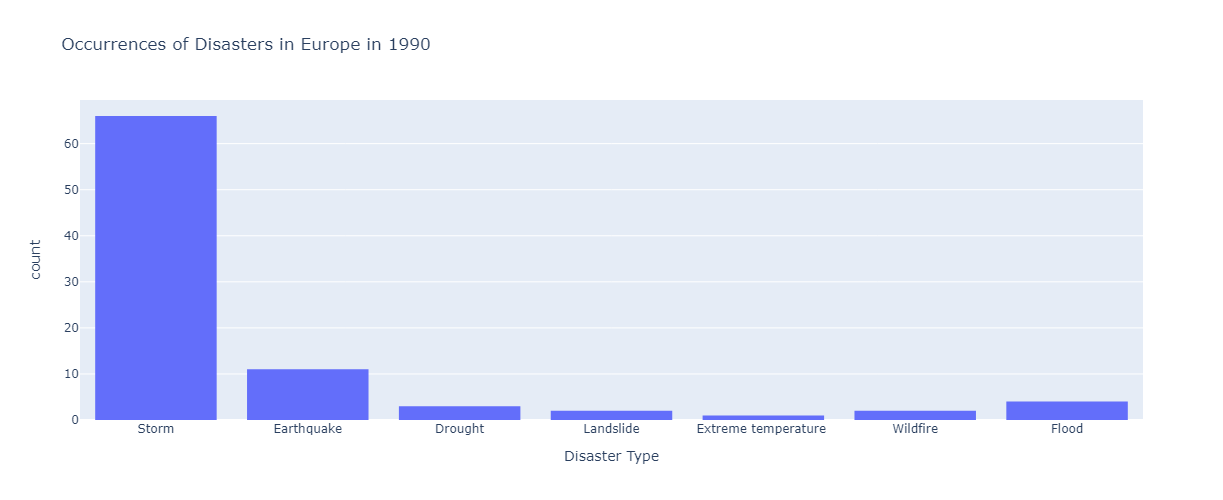

In [78]:
fig = px.histogram(europe_1990_data, x='Disaster Type',
                   title='Occurrences of Disasters in Europe in 1990',
                   labels={'Disaster Type': 'Disaster Type', 'count': 'Number of Occurrences'})

# עדכון הפרמטרים של הגרף
fig.update_layout(width=900, height=500)

# הצגת הגרף
fig.show()

In [79]:
filtered_data = read_file[(read_file['Disaster Type'] == 'Storm') & 
                          (read_file['Continent'] == 'Europe') & 
                          (read_file['Year'] == 1990)]

# קביעת העמודות הרלוונטיות לניתוח
relevant_columns = ['Disaster Subtype', 'Total Deaths', 'No Injured', 'Total Affected']

# קיבוץ הנתונים וחישוב סכומים
grouped_data = filtered_data[relevant_columns].groupby('Disaster Subtype').sum()

# הצגת הנתונים בצורה גרפית או טבלאית
print(grouped_data)

                  Total Deaths  No Injured  Total Affected
Disaster Subtype                                          
Convective storm           0.0         0.0             0.0


In [80]:
# סינון הנתונים עבור סופות בשנת 1990 באירופה
data_europe_1990 = read_file[(read_file['Disaster Type'] == 'Storm') & (read_file['Year'] == 1990) & (read_file['Continent'] == 'Europe')]

# קביעת סוגי הסופות השונים בשנת 1990 באירופה
storm_types = data_europe_1990['Disaster Subtype'].unique()

# בדיקת נתוני נפגעים ונפטרים עבור כל סוג של סופה בשנת 1990 באירופה
for storm_type in storm_types:
    data_storm_type = data_europe_1990[data_europe_1990['Disaster Subtype'] == storm_type]
    total_deaths = data_storm_type['Total Deaths'].sum()
    total_injured = data_storm_type['No Injured'].sum()
    total_affected = data_storm_type['Total Affected'].sum()
    print(f"Disaster Subtype: {storm_type}")
    print(f"Total Deaths: {total_deaths}")
    print(f"No Injured: {total_injured}")
    print(f"Total Affected: {total_affected}")
    print("---------------------------")


Disaster Subtype: Convective storm
Total Deaths: 0.0
No Injured: 0.0
Total Affected: 0.0
---------------------------
Disaster Subtype: nan
Total Deaths: 0.0
No Injured: 0.0
Total Affected: 0.0
---------------------------


In [81]:
unique_disaster_subtypes = read_file['Disaster Subtype'].unique()
print(unique_disaster_subtypes)

['Drought' 'Ground movement' 'Ash fall' 'Rockfall' 'Tropical cyclone' nan
 'Bacterial disease' 'Landslide' 'Avalanche' 'Forest fire'
 'Riverine flood' 'Convective storm' 'Viral disease' 'Mudslide' 'Tsunami'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Locust'
 'Severe winter conditions' 'Grasshopper' 'Subsidence'
 'Extra-tropical storm' 'Lava flow' 'Pyroclastic flow ']


In [82]:
# סינון הנתונים לפי סוגי הסופות ולפי שנת 1990 באירופה
filtered_data_tropical_cyclone = read_file[
    (read_file['Disaster Type'] == 'Storm') & 
    (read_file['Disaster Subtype'] == 'Tropical cyclone') & 
    (read_file['Year'] == 1990) & 
    (read_file['Continent'] == 'Europe')
]

filtered_data_convective_storm = read_file[
    (read_file['Disaster Type'] == 'Storm') & 
    (read_file['Disaster Subtype'] == 'Convective storm') & 
    (read_file['Year'] == 1990) & 
    (read_file['Continent'] == 'Europe')
]

filtered_data_extra_tropical_storm = read_file[
    (read_file['Disaster Type'] == 'Storm') & 
    (read_file['Disaster Subtype'] == 'Extra-tropical storm') & 
    (read_file['Year'] == 1990) & 
    (read_file['Continent'] == 'Europe')
]

# חישוב סך הכל של הרוגים והנפגעים בכל סוג של סופה
total_deaths_tropical_cyclone = filtered_data_tropical_cyclone['Total Deaths'].sum()
total_injured_tropical_cyclone = filtered_data_tropical_cyclone['No Injured'].sum()
total_affected_tropical_cyclone = filtered_data_tropical_cyclone['Total Affected'].sum()

total_deaths_convective_storm = filtered_data_convective_storm['Total Deaths'].sum()
total_injured_convective_storm = filtered_data_convective_storm['No Injured'].sum()
total_affected_convective_storm = filtered_data_convective_storm['Total Affected'].sum()

total_deaths_extra_tropical_storm = filtered_data_extra_tropical_storm['Total Deaths'].sum()
total_injured_extra_tropical_storm = filtered_data_extra_tropical_storm['No Injured'].sum()
total_affected_extra_tropical_storm = filtered_data_extra_tropical_storm['Total Affected'].sum()

# הצגת התוצאות
print(f"Tropical cyclone - Total Deaths: {total_deaths_tropical_cyclone}, Total Injured: {total_injured_tropical_cyclone}, Total Affected: {total_affected_tropical_cyclone}")
print(f"Convective storm - Total Deaths: {total_deaths_convective_storm}, Total Injured: {total_injured_convective_storm}, Total Affected: {total_affected_convective_storm}")
print(f"Extra-tropical storm - Total Deaths: {total_deaths_extra_tropical_storm}, Total Injured: {total_injured_extra_tropical_storm}, Total Affected: {total_affected_extra_tropical_storm}")

Tropical cyclone - Total Deaths: 0.0, Total Injured: 0.0, Total Affected: 0.0
Convective storm - Total Deaths: 0.0, Total Injured: 0.0, Total Affected: 0.0
Extra-tropical storm - Total Deaths: 0.0, Total Injured: 0.0, Total Affected: 0.0


In [90]:
filtered_data_europe_storms = read_file[
    (read_file['Disaster Type'] == 'Storm') & 
    (read_file['Year'] == 1990) & 
    (read_file['Continent'] == 'Europe')]

total_deaths_europe = filtered_data_europe_storms['Total Deaths'].sum()
total_injured_europe = filtered_data_europe_storms['No Injured'].sum()

print(f"Total Deaths from Storms in Europe (1990): {total_deaths_europe}")
print(f"Total Injured from Storms in Europe (1990): {total_injured_europe}")

Total Deaths from Storms in Europe (1990): 255.0
Total Injured from Storms in Europe (1990): 0.0


In [91]:
import pandas as pd

# קריאת הנתונים מה-URL
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

# סינון וחישוב נתוני כל היבשות - סוגי סופות וסיכום לפי יבשות
continent_disaster_counts = read_file.groupby(['Continent', 'Disaster Type']).size().reset_index(name='Count')

# סינון וחישוב נתוני כל היבשות בשנת 1990 - סוגי סופות וסיכום לפי יבשות
filtered_data_1990 = read_file[
    (read_file['Year'] == 1990) &
    (read_file['Disaster Type'] == 'Storm')
]

# מחיקת יבשות שאינן ברשימת היבשות
filtered_data_1990 = filtered_data_1990.merge(continent_disaster_counts, on=['Continent', 'Disaster Type'], how='inner')

# חישוב סך הרוגים והפצועים לכל יבשה בשנת 1990
summary_1990 = filtered_data_1990.groupby(['Continent']).agg({
    'Total Deaths': 'sum',
    'No Injured': 'sum'
}).reset_index()

# הצגת הנתונים
print(summary_1990)

  Continent  Total Deaths  No Injured
0    Africa           2.0         0.0
1  Americas         208.0         0.0
2      Asia        4129.0      2110.0
3    Europe         255.0         0.0
4   Oceania          10.0         3.0


In [92]:
import pandas as pd

# קריאת הנתונים מה-URL
url_path = 'https://raw.githubusercontent.com/edenjacob/ProjectRinaEden/e46a69a90cb1e6abbbd3ec1b50c4e94ea6d6e054/ALL%20NATURAL%20DISASTERS.csv'
read_file = pd.read_csv(url_path, encoding='ISO-8859-1')

# סינון לפי סוגי הסופות וסיכום לפי סוגי הסופות ומספר ההרוגים והפצועים
filtered_data_storms = read_file[
    (read_file['Disaster Type'] == 'Storm') &
    (read_file['Year'] == 1990)
]

summary_by_storm_type = filtered_data_storms.groupby(['Disaster Subtype']).agg({
    'Total Deaths': 'sum',
    'No Injured': 'sum'
}).reset_index()

# הצגת הנתונים
print(summary_by_storm_type)

   Disaster Subtype  Total Deaths  No Injured
0  Convective storm         855.0       278.0
1  Tropical cyclone        3086.0      1835.0


In [95]:
# סינון לפי סוג הסופה (Tropical cyclone), שנת 1990 ויבשת אירופה
filtered_data = read_file[
    (read_file['Disaster Type'] == 'Storm') &
    (read_file['Disaster Subtype'] == 'Tropical cyclone') &
    (read_file['Year'] == 1990) &
    (read_file['Continent'] == 'Europe')]
print(filtered_data)

Empty DataFrame
Columns: [Year, Seq, Glide, Disaster Group, Disaster Subgroup, Disaster Type, Disaster Subtype, Disaster Subsubtype, Event Name, Country, ISO, Region, Continent, Location, Origin, Associated Dis, Associated Dis2, OFDA Response, Appeal, Declaration, Aid Contribution, Dis Mag Value, Dis Mag Scale, Latitude, Longitude, Local Time, River Basin, Start Year, Start Month, Start Day, End Year, End Month, End Day, Total Deaths, No Injured, No Affected, No Homeless, Total Affected, Insured Damages ('000 US$), Total Damages ('000 US$), CPI, Adm Level, Admin1 Code, Admin2 Code, Geo Locations]
Index: []

[0 rows x 45 columns]


In [99]:
read_file[['Disaster Type','Disaster Subtype']]

,Disaster Type,Disaster Subtype
0,Drought,Drought
1,Drought,Drought
2,Earthquake,Ground movement
3,Volcanic activity,Ash fall
4,Volcanic activity,Ash fall
...,...,...
16121,Flood,NaN
16122,Flood,NaN
16123,Epidemic,Viral disease
16124,Flood,NaN


In [101]:
x=read_file[['Disaster Type','Disaster Subtype']]
filtered_data = x[x['Disaster Type'] == 'Storm']
filtered_data

,Disaster Type,Disaster Subtype
7,Storm,Tropical cyclone
14,Storm,Tropical cyclone
18,Storm,Tropical cyclone
19,Storm,Tropical cyclone
22,Storm,Tropical cyclone
...,...,...
16098,Storm,Convective storm
16101,Storm,Convective storm
16115,Storm,Tropical cyclone
16117,Storm,Convective storm


In [202]:
flood_2000 = read_file[(read_file['Disaster Type'] == 'Flood') & (read_file['Year'] >= 2000)]
counts_per_continent = flood_2000['Continent'].value_counts().reset_index()
counts_per_continent.columns = ['Continent', 'Counts']
counts_per_continent #מיון מספר אירועי הצפות לפי יבשת בין השנים 2000-2021

,Continent,Counts
0,Asia,1459
1,Africa,858
2,Americas,761
3,Europe,450
4,Oceania,91


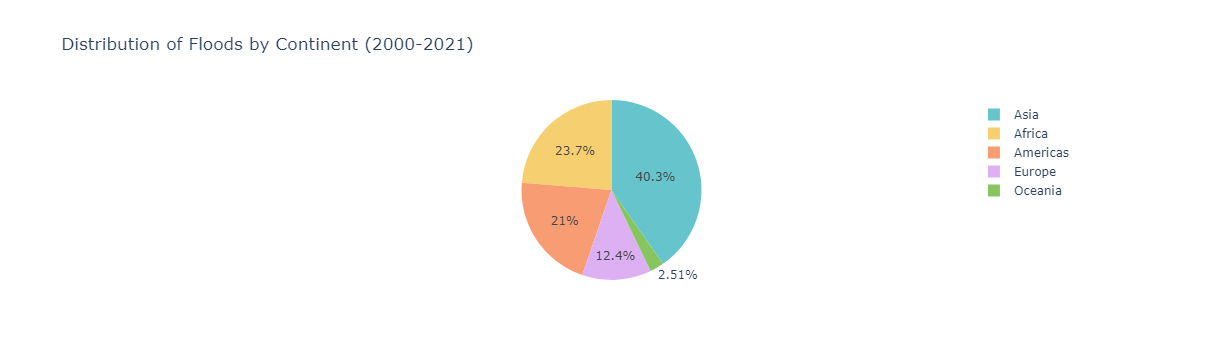

In [203]:
fig = px.pie(counts_per_continent, values='Counts', names='Continent', 
             title='Distribution of Floods by Continent (2000-2021)',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

In [182]:
## יצירת מילון של עונות
season_dict = {'Winter': [12, 1, 2],'Spring': [3, 4, 5],'Summer': [6, 7, 8],'Autumn': [9, 10, 11]}

def map_month_to_season(month):
    for season, months in season_dict.items():
        if month in months:
            return season
    return None

In [153]:
#הוספת עמודה חדשה לקובץ -עונות
read_file['Season'] = read_file['Start Month'].apply(map_month_to_season)
read_file['Season']

0          None
1          None
2        Spring
3        Spring
4        Autumn
          ...  
16121    Summer
16122    Winter
16123    Autumn
16124    Winter
16125    Spring
Name: Season, Length: 16126, dtype: object

In [154]:
read_file['Season'].isnull().sum()

387

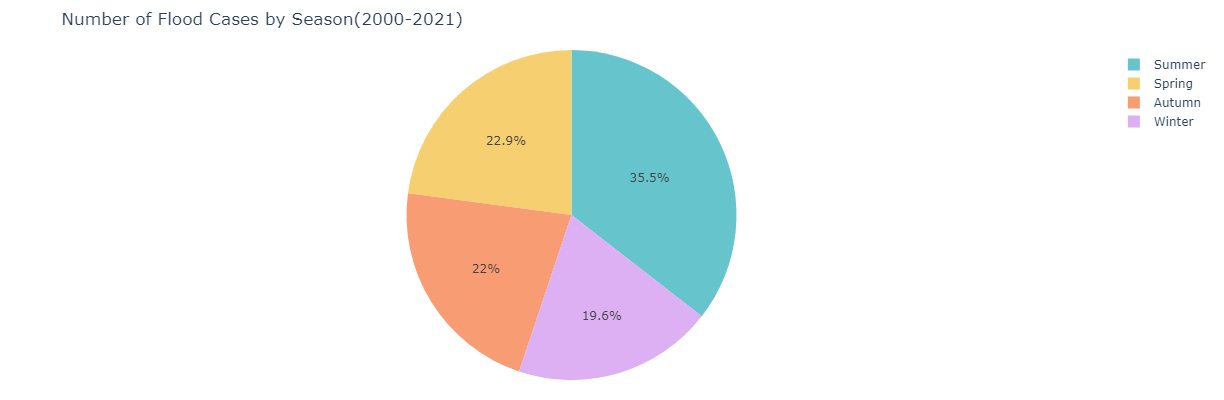

In [176]:
#df_flood = read_file[read_file['Disaster Type'] == 'Flood']
season_counts = flood_2000['Season'].value_counts()

fig = px.pie(values=season_counts.values, names=season_counts.index, title='Flood Cases by Season', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_text='Number of Flood Cases by Season(2000-2021)', width=450, height=400,margin=dict(l=50, r=50, t=50, b=20), showlegend=True)

#### מסקנה 2:

הופתענו לגלות כי העונה השכיחה ביותר להצפות היא דווקא בקיץ

בניגוד לדעה הפופולארית שהצפות מתרחשות בחורף